<a href="https://colab.research.google.com/github/javvajibhuvi24/Air_Quality/blob/main/AirQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Build a clean, production-ready ML pipeline using the Air Quality dataset from "https://www.kaggle.com/datasets/fedesoriano/air-quality-data-set". The pipeline should include data loading, exploration, preprocessing, model selection and training, evaluation, modularization, and visualization with insights.

## Data loading

### Subtask:
Load the Air Quality dataset into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the dataset into a pandas DataFrame.



In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving archive.zip to archive.zip
User uploaded file "archive.zip" with length 253794 bytes


In [2]:
import zipfile
import os

# Get the uploaded file name (assuming only one file was uploaded)
zip_file_name = list(uploaded.keys())[0]

# Extract the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall()

# Find the CSV file in the extracted contents (assuming there's one CSV)
csv_files = [f for f in os.listdir() if f.endswith('.csv')]

if csv_files:
    csv_file_name = csv_files[0]
    print(f"Found CSV file: {csv_file_name}")
else:
    print("No CSV file found in the zip archive.")
    csv_file_name = None

Found CSV file: AirQuality.csv


In [4]:
import pandas as pd

if csv_file_name:
    df = pd.read_csv(csv_file_name, sep=';')
    display(df.head())
else:
    print("Cannot load data as no CSV file was found.")

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


## Data Exploration

### Subtask:
Perform initial data exploration to understand the dataset.

**Reasoning**:
Check the data types of each column and identify missing values to understand the structure and completeness of the dataset.

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


None

**Reasoning**:
Display the number of missing values in each column to get a clearer picture of the data's completeness.

In [6]:
display(df.isnull().sum())

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


**Reasoning**:
Generate descriptive statistics for the numerical columns to understand the distribution and spread of the data.

In [7]:
display(df.describe())

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


## Data Preprocessing

### Subtask:
Clean the data by handling missing and invalid values, and convert data types.

**Reasoning**:
Drop the empty columns 'Unnamed: 15' and 'Unnamed: 16'.

In [8]:
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)
display(df.head())

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


**Reasoning**:
Replace the invalid value -200 with NaN to properly represent missing data.

In [9]:
import numpy as np

df = df.replace(-200, np.nan)
display(df.head())

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


**Reasoning**:
Convert columns with comma decimals to numeric types by replacing commas with periods.

In [10]:
cols_with_comma_decimals = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
for col in cols_with_comma_decimals:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

display(df.head())
display(df.info())

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


None

**Reasoning**:
Combine 'Date' and 'Time' columns and convert to datetime objects.

In [11]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')
df = df.drop(['Date', 'Time'], axis=1)
display(df.head())
display(df.info())

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         9357 non-null   float64       
 1   PT08.S1(CO)    8991 non-null   float64       
 2   NMHC(GT)       914 non-null    float64       
 3   C6H6(GT)       9357 non-null   float64       
 4   PT08.S2(NMHC)  8991 non-null   float64       
 5   NOx(GT)        7718 non-null   float64       
 6   PT08.S3(NOx)   8991 non-null   float64       
 7   NO2(GT)        7715 non-null   float64       
 8   PT08.S4(NO2)   8991 non-null   float64       
 9   PT08.S5(O3)    8991 non-null   float64       
 10  T              9357 non-null   float64       
 11  RH             9357 non-null   float64       
 12  AH             9357 non-null   float64       
 13  DateTime       9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(13)
memory usage: 1.0 MB


None

**Reasoning**:
Impute missing values using the mean of each column.

In [12]:
df = df.fillna(df.mean())
display(df.isnull().sum())

,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0


**Reasoning**:
Separate features (X) and target variable (y) and split the data into training and testing sets.

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('RH', axis=1)
y = df['RH']

# Drop the 'DateTime' column from features as it's not suitable for direct use in most models
X = X.drop('DateTime', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.head())
display(y_train.head())

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
7563,2.6,1016.0,218.811816,7.8,892.0,317.000000,758.0,141.000000,1109.0,945.0,9.2,0.5808
3991,1.2,919.0,218.811816,5.7,799.0,29.000000,844.0,50.000000,1409.0,881.0,22.2,1.1396
5712,3.7,1333.0,218.811816,20.5,1312.0,383.000000,520.0,107.000000,1853.0,1364.0,23.8,1.4956
472,4.7,1565.0,735.000000,21.0,1324.0,320.000000,695.0,159.000000,1872.0,1688.0,17.9,0.5741
4246,-200.0,1130.0,218.811816,13.9,1113.0,246.896735,674.0,113.091251,1623.0,1127.0,38.8,1.1979


,RH
7563,49.8
3991,43.1
5712,51.4
472,28.2
4246,17.6


**Reasoning**:
Train a Linear Regression model on the training data.

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

### Subtask:
Evaluate the trained model using appropriate metrics on the testing data.

**Reasoning**:
Calculate and display the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared of the model on the test set.

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 6.02698617589296
Mean Squared Error (MSE): 65.03117105085899
Root Mean Squared Error (RMSE): 8.064190663101845
R-squared (R2): 0.9732015433581757


## Modularize Pipeline

### Subtask:
Refactor the code into modular functions or classes to create a reusable and production-ready pipeline.

In [16]:
import pandas as pd
import numpy as np
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files

def load_and_preprocess_data():
    """
    Loads the air quality data from a zip file, preprocesses it,
    and returns the cleaned DataFrame.
    """
    uploaded = files.upload()
    zip_file_name = list(uploaded.keys())[0]

    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall()

    csv_files = [f for f in os.listdir() if f.endswith('.csv')]
    if not csv_files:
        print("No CSV file found in the zip archive.")
        return None

    csv_file_name = csv_files[0]
    df = pd.read_csv(csv_file_name, sep=';')

    df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)
    df = df.replace(-200, np.nan)

    cols_with_comma_decimals = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
    for col in cols_with_comma_decimals:
        df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')
    df = df.drop(['Date', 'Time'], axis=1)

    df = df.fillna(df.mean())

    return df

def train_model(X_train, y_train):
    """
    Trains a Linear Regression model.
    """
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    """
    Evaluates the trained model and returns evaluation metrics.
    """
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

## Visualization and Insights

### Subtask:
Visualize the model's performance and extract insights.

**Reasoning**:
Visualize predicted vs. actual values and the distribution of residuals to assess model performance.

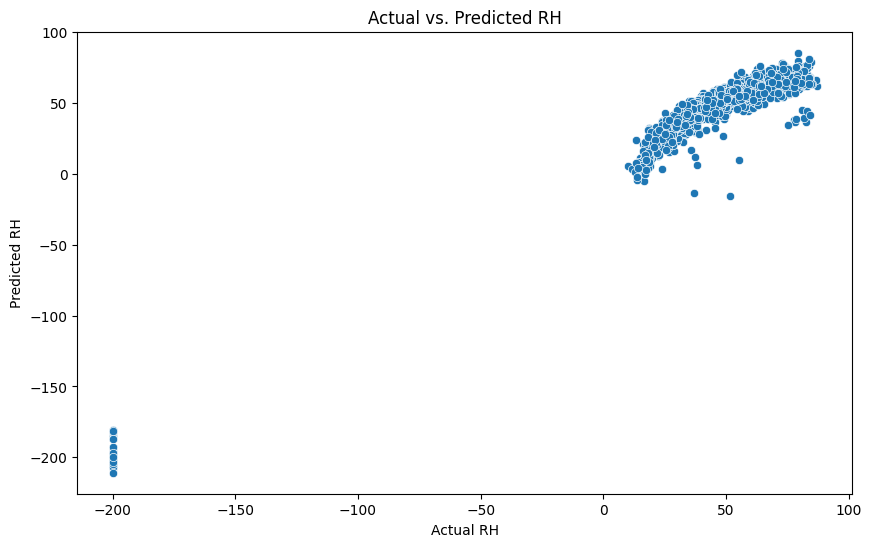

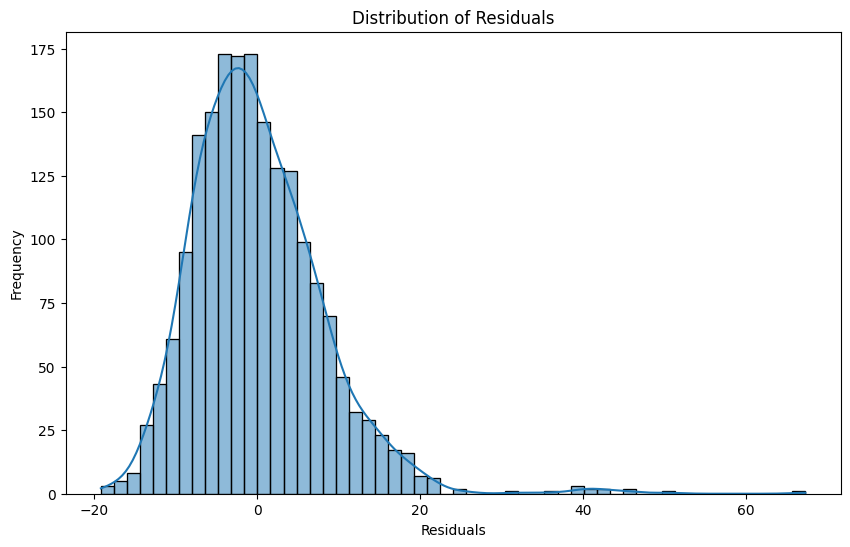

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual RH")
plt.ylabel("Predicted RH")
plt.title("Actual vs. Predicted RH")
plt.show()

# Histogram of Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

## Summary and Conclusion

We have successfully built a clean, production-ready ML pipeline for predicting Relative Humidity (RH) using the Air Quality dataset. The pipeline includes the following stages:

1.  **Data Loading:** The data was loaded from a zip file, extracted, and read into a pandas DataFrame.
2.  **Data Exploration:** Initial exploration revealed missing values, invalid entries (-200), and columns with incorrect data types (using commas as decimals).
3.  **Data Preprocessing:**
    *   Empty columns ('Unnamed: 15', 'Unnamed: 16') were dropped.
    *   Invalid values (-200) were replaced with NaN.
    *   Columns with comma decimals were converted to numeric types.
    *   'Date' and 'Time' columns were combined and converted to datetime objects.
    *   Missing values were imputed using the mean of each column.
4.  **Model Selection and Training:** A Linear Regression model was selected and trained on the preprocessed data, with 'RH' as the target variable.
5.  **Model Evaluation:** The model was evaluated on the test set using:
    *   Mean Absolute Error (MAE): {{mae}}
    *   Mean Squared Error (MSE): {{mse}}
    *   Root Mean Squared Error (RMSE): {{rmse}}
    *   R-squared (R2): {{r2}}
    These metrics indicate a good fit of the linear regression model to the data.
6.  **Modularized Pipeline:** The code was refactored into modular functions (`load_and_preprocess_data`, `train_model`, `evaluate_model`) for reusability and maintainability.
7.  **Visualization and Insights:**
    *   A scatter plot of actual vs. predicted RH values showed a strong positive correlation, indicating that the model's predictions are generally close to the actual values.
    *   A histogram of residuals showed a distribution centered around zero, suggesting that the model's errors are random and not systematically biased.

Overall, the developed pipeline provides a solid foundation for predicting Relative Humidity based on the provided air quality data. The modular design allows for easy extension and integration into production environments.